<a href="https://colab.research.google.com/github/Yamm23/Computer-Vision-Mini/blob/main/FruitImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

raw_path = "/content/drive/MyDrive/CNN/Fruits9"
base_dir = "/content/fruits_split"
train_dir, val_dir, test_dir = [os.path.join(base_dir, d) for d in ["train", "val", "test"]]

# Create split folders
for d in [train_dir, val_dir, test_dir]: os.makedirs(d, exist_ok=True)

In [2]:
import shutil
from sklearn.model_selection import train_test_split

# Go through each fruit class
for fruit_class in os.listdir(raw_path):
    class_path = os.path.join(raw_path, fruit_class)
    if not os.path.isdir(class_path): continue

    images = os.listdir(class_path)
    train_imgs, temp_imgs = train_test_split(images, test_size=0.3, random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.5, random_state=42)

    for folder, files in zip([train_dir, val_dir, test_dir], [train_imgs, val_imgs, test_imgs]):
        class_folder = os.path.join(folder, fruit_class)
        os.makedirs(class_folder, exist_ok=True)
        for img in files:
            shutil.copy(os.path.join(class_path, img), os.path.join(class_folder, img))


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 16

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest').flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')

val_gen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest').flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')

test_gen = ImageDataGenerator(    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest').flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 251 images belonging to 9 classes.
Found 54 images belonging to 9 classes.
Found 54 images belonging to 9 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_gen, epochs=15, validation_data=val_gen, callbacks=[early_stop])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 818ms/step - accuracy: 0.1427 - loss: 2.2213 - val_accuracy: 0.2222 - val_loss: 1.9186
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 601ms/step - accuracy: 0.3156 - loss: 1.8415 - val_accuracy: 0.2778 - val_loss: 1.6570
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 566ms/step - accuracy: 0.3734 - loss: 1.6132 - val_accuracy: 0.3148 - val_loss: 1.5657
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 649ms/step - accuracy: 0.4329 - loss: 1.5557 - val_accuracy: 0.5556 - val_loss: 1.3028
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 611ms/step - accuracy: 0.4780 - loss: 1.3615 - val_accuracy: 0.5370 - val_loss: 1.2792
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 580ms/step - accuracy: 0.5924 - loss: 1.2204 - val_accuracy: 0.5556 - val_loss: 1.3299
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 561ms/step - accuracy: 0.5058 - loss: 1.2572 - val_accuracy: 0.5185 - val_loss: 1.4163
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 596ms/step - accuracy: 0.5465 - loss: 1.2000 - val_accur

In [5]:
# Evaluate
loss, acc = model.evaluate(test_gen)
print(f"Test Accuracy: {acc * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step - accuracy: 0.7826 - loss: 1.0790
Test Accuracy: 72.22%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


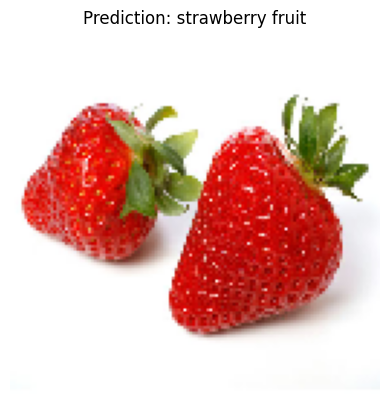

In [22]:
# Predict a test image
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_tensor = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_tensor)
    class_idx = np.argmax(prediction)
    class_name = list(train_gen.class_indices.keys())[class_idx]

    plt.imshow(img)
    plt.title(f"Prediction: {class_name}")
    plt.axis('off')
    plt.show()

# Example:
predict_image("/content/fruits_split/test/strawberry fruit/Image_19.jpg")


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_gen.classes

print(confusion_matrix(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes, target_names=test_gen.class_indices.keys()))


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 364ms/step
[[4 1 0 0 1 0 0 0 0]
 [0 6 0 0 0 0 0 0 0]
 [1 0 5 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0]
 [1 1 0 0 4 0 0 0 0]
 [0 0 0 0 0 6 0 0 0]
 [0 1 0 1 0 0 1 3 0]
 [0 0 0 1 0 0 0 5 0]
 [2 0 0 0 0 0 0 0 4]]
                  precision    recall  f1-score   support

     apple fruit       0.50      0.67      0.57         6
    banana fruit       0.67      1.00      0.80         6
    cherry fruit       1.00      0.83      0.91         6
   chickoo fruit       0.75      1.00      0.86         6
    grapes fruit       0.80      0.67      0.73         6
      kiwi fruit       1.00      1.00      1.00         6
     mango fruit       1.00      0.17      0.29         6
    orange fruit       0.62      0.83      0.71         6
strawberry fruit       1.00      0.67      0.80         6

        accuracy                           0.76        54
       macro avg       0.82      0.76      0.74        54
    weighted avg       0.82      0.76      0.74        54

